In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import gpu_tracking
import tifffile
import pandas as pd
import trackpy as tp
# arr = tifffile.imread("../emily_tracking/sample_vids/s_20.tif").astype("float32")#[None, ...]
coords = lambda df: df[["y", "x"]].to_numpy().T
# from scipy.spatial import KDTree
# with open("centers.bin", "rb") as file:
#     data = file.read()
# last_dim = 2
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, last_dim)
# with open("test", "rb") as file:
#     data = file.read()
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, 2)
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, last_dim)
# plt.imshow(centers[:, :, 0])

In [3]:
import gpu_tracking
import matplotlib.pyplot as plt

In [5]:

path = r"C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\tiff_vsi\vsi dummy\_Process_9747_\stack1\frame_t_0.ets"
test = gpu_tracking.parse_ets(path)
# gpu_tracking.batch_file(path, 9, channel = 0)

TypeError: parse_ets() got an unexpected keyword argument 'channel'

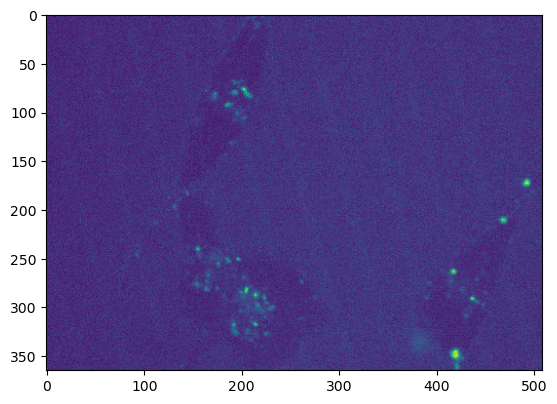

In [2]:
plt.imshow(test[1][0])

In [6]:
%%timeit
arr = tifffile.imread("../emily_tracking/sample_vids/s_20.tif").astype("float32")

3.27 s ± 411 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
res = gpu_tracking.batch_file("../emily_tracking/sample_vids/s_20.tif", 9, search_range = 9)

4.68 s ± 1.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
res = gpu_tracking.batch(arr, 9, cpu_processed = True, characterize = True,
    minmass = 800, search_range = 9, sig_radius = 3, bg_radius = np.sqrt(60))

In [4]:
res

array([[0.0000000e+00, 9.2041394e+02, 5.0332780e+00, ..., 1.0574400e+05,
        7.0274506e+01, 3.1710908e-01],
       [0.0000000e+00, 1.2038627e+03, 2.8821106e+01, ..., 1.0614700e+05,
        8.5366386e+01, 4.7842631e-01],
       [0.0000000e+00, 1.0644497e+03, 8.8670683e+00, ..., 1.0748000e+05,
        9.3718376e+01, 1.2344580e-01],
       ...,
       [1.9990000e+03, 9.8636310e+02, 4.3907785e+02, ..., 1.0492400e+05,
        9.8172394e+01, 2.1739517e-01],
       [1.9990000e+03, 1.3927938e+03, 5.0282434e+02, ..., 1.0615800e+05,
        1.0642604e+02, 1.6300951e-01],
       [1.9990000e+03, 8.3199286e+02, 4.6997037e+02, ..., 1.0530500e+05,
        7.1616234e+01, 2.5572792e-01]], dtype=float32)

In [ ]:
723923

In [2]:
# with open("trackpy_reference/locations.pkl", "rb") as file:
#     tp_df = pickle.load(file)
diameter = 9
minmass = 0
separation = 10
my_df = pd.DataFrame(gpu_tracking.batch(arr[0:1], diameter, minmass = minmass, separation = separation), columns = ["frame", "mass", "y", "x"])
my_df = my_df.astype({"frame": int})[["frame", "y", "x", "mass"]]

tp_df = tp.batch(arr, diameter, threshold = 0, percentile = 0, minmass = minmass, characterize = False, separation = separation)

# my_tree = KDTree(coords(my_df).T)
# tp_tree = KDTree(coords(tp_df).T)
# dists, inds = my_tree.query(coords(tp_df).T, distance_upper_bound = 0.01)

Frame 0: 923 features


In [6]:
gpu_tracking.batch(arr[0:1], 9, characterize = True, search_range = 9)

array([[0.0000000e+00, 9.2041394e+02, 5.0332780e+00, ..., 1.0574400e+05,
        7.0274506e+01, 3.1710908e-01],
       [0.0000000e+00, 1.2038627e+03, 2.8821106e+01, ..., 1.0614700e+05,
        8.5366386e+01, 4.7842631e-01],
       [0.0000000e+00, 7.1700854e+02, 2.3329378e+01, ..., 1.0477400e+05,
        6.4499741e+01, 3.3111680e-01],
       ...,
       [0.0000000e+00, 8.4966968e+02, 4.8952609e+02, ..., 1.0578500e+05,
        6.9270416e+01, 2.7039120e-01],
       [0.0000000e+00, 5.4927820e+02, 5.0191724e+02, ..., 1.0365200e+05,
        9.1390549e+01, 5.3728808e-02],
       [0.0000000e+00, 6.0075745e+02, 5.0236938e+02, ..., 1.0467000e+05,
        8.2828323e+01, 3.5824618e-01]], dtype=float32)

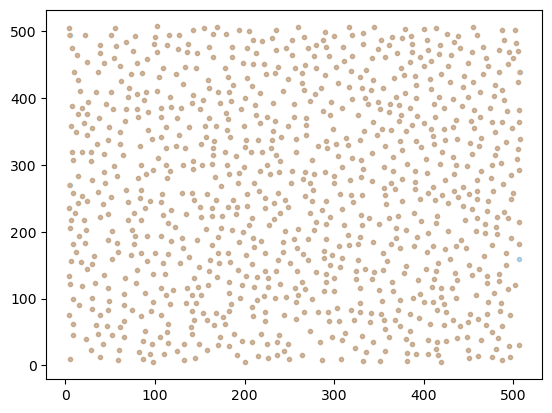

In [6]:
plt.plot(*coords(my_df), "C0.", alpha = 0.3)
plt.plot(*coords(tp_df), "C1.", alpha = 0.3)
# plt.plot(*next(it)[1].T, "C2.", alpha = 0.3)
# plt.plot(*coords(tp_df).T[dists == np.inf][26].T, "C2.", alpha = 0.3)

In [11]:
(my_df[["x", "y"]] > 511).sum()

x    2
y    2
dtype: int64

In [10]:
(my_df[["x", "y"]] < 0).sum()

x    4
y    1
dtype: int64

In [11]:
my_df

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,11.185135,227.674576,701.138489
3,0,11.741593,349.500702,811.161987
4,0,11.922229,341.975342,747.229126
...,...,...,...,...
644,0,497.107788,190.423584,787.688293
645,0,496.959900,248.419052,968.822021
646,0,498.052063,355.679932,802.113403
647,0,498.293976,392.127533,709.902344


In [19]:
tp.masks.gaussian_kernel(1, 4)[:, None]

array([[-0.99986617],
       [-0.99556814],
       [-0.94600887],
       [-0.75802855],
       [-0.60105653],
       [-0.75802855],
       [-0.94600887],
       [-0.99556814],
       [-0.99986617]])

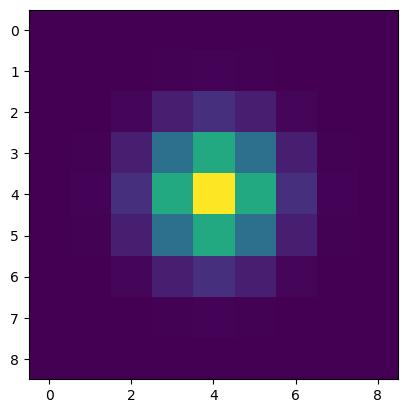

In [18]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None] * tp.masks.gaussian_kernel(1, 4)[None, :])

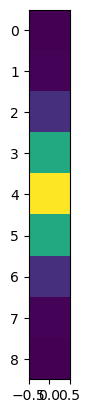

In [14]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None])

In [10]:
print(len(my_df))
print(len(tp_df))

1151
1103


In [12]:

# my_tree.query_ball_tree(tp_tree, 0.05)

In [13]:
print((dists != np.inf).sum())
dists[dists != np.inf]
inds[dists != np.inf]
pass

948


In [15]:
it = enumerate(iter(coords(tp_df).T[dists == np.inf]))

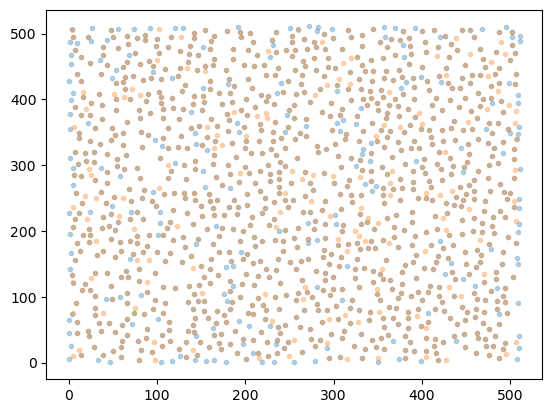

In [14]:
3//2

1

In [ ]:
tp_df

,y,x,mass
0,4.220573,74.692416,1054.478337
1,4.599053,270.108974,737.670025
2,4.623336,494.512906,1009.522685
3,5.025773,9.336279,922.702762
4,4.810352,121.785098,638.806371
...,...,...,...
1271,506.159615,181.958809,646.392449
1272,506.280800,214.909562,450.154686
1273,507.019594,339.288914,534.375697
1274,506.581047,381.735925,713.557145


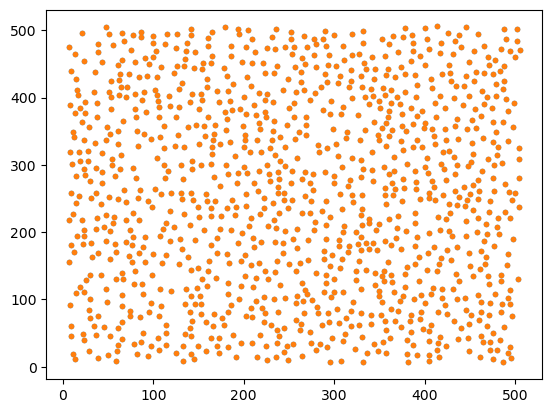

In [ ]:
plt.plot(*coords(my_df).T[inds[dists != np.inf]].T, ".", alpha = 1)
plt.plot(*coords(tp_df).T[dists != np.inf].T, ".", alpha = 1)